<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">

<h1 align=left><font size = 8"><b>Inteligência Artificial</b></font></h1>
<h1 align=left><font size = 6"><b>Aprendizado Não Supervisionado e Detecção de Anomalia</b></font></h2>

# Atividade: T6 - Atividade de aprofundamento

Nome: Bruno Rebocho de Toledo

Turma: 01B

Matrícula: 92316328

# T2

### Ler o arquivo

In [1]:
#!pip install pandas-ods-reader

In [2]:
import pandas as pd
from pandas_ods_reader import read_ods

#Carregamento do dataset
df = read_ods('data/Composicao_RMs_RIDEs_AglomUrbanas_2020_06_30.ods')
df

,GRANDE_REG,COD_UF,SIGLA_UF,COD,NOME,TIPO,COD_CAT_ASSOC,CAT_ASSOC,COD_MUN,NOME_MUN,LEG,DATA
0,Centro-Oeste,53.0,DF,5301.0,Região Integrada de Desenvolvimento do Distrit...,RIDE,530101.0,NÃO TEM,5300108.0,BRASÍLIA,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...,1998-02-19T00:00:00
1,Centro-Oeste,52.0,GO,5202.0,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201.0,NÃO TEM,5200100.0,ABADIÂNIA,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...,1998-02-19T00:00:00
2,Centro-Oeste,52.0,GO,5202.0,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201.0,NÃO TEM,5200175.0,ÁGUA FRIA DE GOIÁS,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...,1998-02-19T00:00:00
3,Centro-Oeste,52.0,GO,5202.0,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201.0,NÃO TEM,5200258.0,ÁGUAS LINDAS DE GOIÁS,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...,1998-02-19T00:00:00
4,Centro-Oeste,52.0,GO,5202.0,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201.0,NÃO TEM,5200308.0,ALEXÂNIA,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...,1998-02-19T00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
1415,Sul,42.0,SC,4202.0,Região Metropolitana do Vale do Itajaí,RM,420201.0,Núcleo Metropolitano,4202404.0,BLUMENAU,Lei Complementar 162,1998-01-06T00:00:00
1416,Sul,42.0,SC,4202.0,Região Metropolitana do Vale do Itajaí,RM,420201.0,Núcleo Metropolitano,4205902.0,GASPAR,Lei Complementar 162,1998-01-06T00:00:00
1417,Sul,42.0,SC,4202.0,Região Metropolitana do Vale do Itajaí,RM,420201.0,Núcleo Metropolitano,4207502.0,INDAIAL,Lei Complementar 162,1998-01-06T00:00:00
1418,Sul,42.0,SC,4202.0,Região Metropolitana do Vale do Itajaí,RM,420201.0,Núcleo Metropolitano,4213203.0,POMERODE,Lei Complementar 162,1998-01-06T00:00:00


### Remover os registros com atributos nulos, caso haja 

In [3]:
df.isnull().sum()

GRANDE_REG       0
COD_UF           0
SIGLA_UF         0
COD              0
NOME             0
TIPO             0
COD_CAT_ASSOC    0
CAT_ASSOC        0
COD_MUN          0
NOME_MUN         0
LEG              0
DATA             0
dtype: int64

### Excluir as colunas: SIGLA_UF, NOME, NOME_MUN, LEG 

In [4]:
df.drop(columns=['SIGLA_UF', 'NOME_MUN', 'LEG'], axis=1, inplace=True)
df.head()

,GRANDE_REG,COD_UF,COD,NOME,TIPO,COD_CAT_ASSOC,CAT_ASSOC,COD_MUN,DATA
0,Centro-Oeste,53.0,5301.0,Região Integrada de Desenvolvimento do Distrit...,RIDE,530101.0,NÃO TEM,5300108.0,1998-02-19T00:00:00
1,Centro-Oeste,52.0,5202.0,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201.0,NÃO TEM,5200100.0,1998-02-19T00:00:00
2,Centro-Oeste,52.0,5202.0,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201.0,NÃO TEM,5200175.0,1998-02-19T00:00:00
3,Centro-Oeste,52.0,5202.0,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201.0,NÃO TEM,5200258.0,1998-02-19T00:00:00
4,Centro-Oeste,52.0,5202.0,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201.0,NÃO TEM,5200308.0,1998-02-19T00:00:00


### Discretizar os valores do campo: GRANDE_REG

In [5]:
col_to_encode = 'GRANDE_REG'
df[col_to_encode].unique()

array(['Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul'],
      dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder

# Aplicando discretização dos campos categóricos
le = LabelEncoder()
df[col_to_encode] = le.fit_transform(df[col_to_encode])
df[col_to_encode].unique()

array([0, 1, 2, 3, 4])

### Exibir o novo arquivo após modificações

In [7]:
display(df)

,GRANDE_REG,COD_UF,COD,NOME,TIPO,COD_CAT_ASSOC,CAT_ASSOC,COD_MUN,DATA
0,0,53.0,5301.0,Região Integrada de Desenvolvimento do Distrit...,RIDE,530101.0,NÃO TEM,5300108.0,1998-02-19T00:00:00
1,0,52.0,5202.0,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201.0,NÃO TEM,5200100.0,1998-02-19T00:00:00
2,0,52.0,5202.0,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201.0,NÃO TEM,5200175.0,1998-02-19T00:00:00
3,0,52.0,5202.0,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201.0,NÃO TEM,5200258.0,1998-02-19T00:00:00
4,0,52.0,5202.0,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201.0,NÃO TEM,5200308.0,1998-02-19T00:00:00
...,...,...,...,...,...,...,...,...,...
1415,4,42.0,4202.0,Região Metropolitana do Vale do Itajaí,RM,420201.0,Núcleo Metropolitano,4202404.0,1998-01-06T00:00:00
1416,4,42.0,4202.0,Região Metropolitana do Vale do Itajaí,RM,420201.0,Núcleo Metropolitano,4205902.0,1998-01-06T00:00:00
1417,4,42.0,4202.0,Região Metropolitana do Vale do Itajaí,RM,420201.0,Núcleo Metropolitano,4207502.0,1998-01-06T00:00:00
1418,4,42.0,4202.0,Região Metropolitana do Vale do Itajaí,RM,420201.0,Núcleo Metropolitano,4213203.0,1998-01-06T00:00:00


# T4

### Selecione duas técnicas de redução dentre as que foram estudadas nas trilhas 3 e 4 (uma linear e uma não linear).

In [8]:
from sklearn.decomposition import PCA, KernelPCA

### Aplique as técnicas, utilizando a biblioteca scikit learn, e analise qual delas teve o melhor desempenho nesta base.

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#Convertendo a coluna 'DATA' em 'ANO'

df['ANO'] = pd.to_datetime(df['DATA']).dt.year
df.drop(columns=['DATA'], axis=1, inplace=True)

# Transformando dados categóricos em numéricos
le = LabelEncoder()

for col in ['NOME', 'TIPO', 'CAT_ASSOC']:
    df[col] = le.fit_transform(df[col])

# Removendo uma única linha que não seguia o padrão da coluna
df.drop(df[df['COD_CAT_ASSOC'] == '350101 a 350105'].index, inplace=True)

# Pré-processamento e redimensionamento
X_std = StandardScaler().fit_transform(df.values)

# PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_std)

# Kernel PCA
kpca = KernelPCA(n_components=3, kernel='rbf', gamma=0.01)
X_kpca = kpca.fit_transform(X_std)

### Apresente os resultados

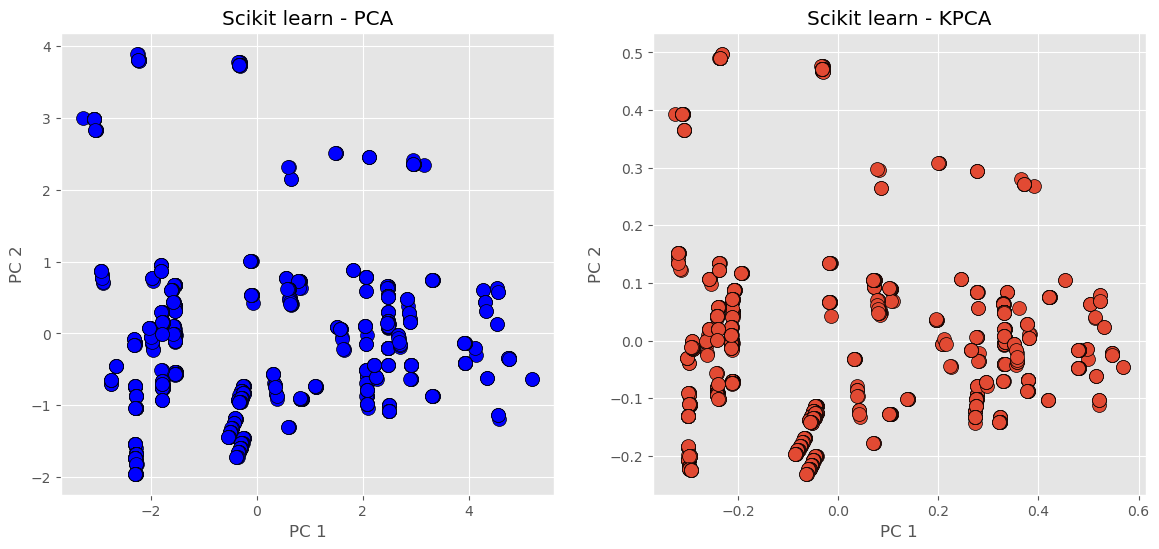

In [10]:
import matplotlib.pyplot as plt

# Plotando ambos gráficos
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    ax[0].scatter(X_pca[:,0], X_pca[:,1], s=100, facecolor='b', edgecolors='k')
    ax[0].set_xlabel('PC 1')
    ax[0].set_ylabel('PC 2')
    ax[0].set_title('Scikit learn - PCA')

    ax[1].scatter(X_kpca[:,0], X_kpca[:,1], s=100, edgecolors='k')
    ax[1].set_xlabel('PC 1')
    ax[1].set_ylabel('PC 2')
    ax[1].set_title('Scikit learn - KPCA')
    plt.show()

In [11]:
import numpy as np

# Análise de dados do PCA
print('Variância por componente principal PCA: {}'.format(pca.explained_variance_ratio_))

# Análise de dados do KPCA
explained_variance = np.var(X_kpca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
print('Variância por componente principal KPCA: {}'.format(explained_variance_ratio))

Variância por componente principal PCA: [0.50086458 0.18353441 0.11499337]
Variância por componente principal KPCA: [0.62049508 0.23357309 0.14593183]


### Descreva o desempenho das técnicas

Através da análise da variância por componente principal, podemos observar que a aplicação da técnica não-linear K-PCA capturou uma proporção maior de variância nos três primeiros grupos, visto que o primeiro obteve um resultado de 62,04% contra 50,08% do PCA, em seguida 22,35% contra 18,35% no segundo e, por fim, 14,59% contra 11,49% no terceiro.

# T6

### Selecione uma técnica particional e uma hierárquica estudada nesta trilha

In [12]:
# Técnica particional: Kmeans
from sklearn.cluster import KMeans

### Aplique, utilizando a biblioteca scikit learn

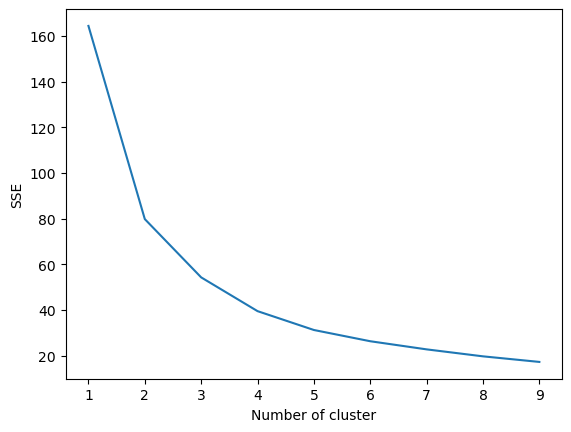

In [13]:
# Aplicando a 'técnica do cotovelo' para auxiliar no número de clusters ideais
sse = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, n_init=10).fit(X_kpca)
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of cluster')
plt.ylabel('SSE')
plt.show()

In [14]:
from sklearn.metrics import davies_bouldin_score

# Função para avaliar diferentes parâmetros
def evaluate_kmeans(n_clusters):
    db_indexes = []
    for n in n_clusters:
        kmeans = KMeans(n_clusters=n, random_state=1, n_init=10).fit(X_kpca)
        db_indexes.append((n, davies_bouldin_score(X_kpca, kmeans.labels_), kmeans.labels_))
    return min(db_indexes, key=lambda x: x[1])

# Verificando os resultados para os valores selecionados
# conforme a 'técnica do cotovelo'
score_kmeans = evaluate_kmeans([3,4,5])

In [15]:
# Técnica hierárquica: Single-Link
from sklearn.cluster import AgglomerativeClustering

# Função para avaliar as diferentes possibilidades do parâmetro 'metric'
def evaluate_singlelink(metrics):
    db_indexes = []
    for m in metrics:
        cluster = AgglomerativeClustering(n_clusters=score_kmeans[0], linkage='average', metric=m).fit(X_kpca)
        db_indexes.append((m, davies_bouldin_score(X_kpca, cluster.labels_), cluster.labels_))
    return min(db_indexes, key=lambda x: x[1])

# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
metrics = ['canberra', 
        'seuclidean', 
        'manhattan', 
        'matching', 
        'yule', 
        'l1', 
        'braycurtis', 
        'dice', 
        'minkowski', 
        'sokalsneath', 
        'sokalmichener', 
        'cosine', 
        'euclidean', 
        'chebyshev', 
        'l2', 
        'sqeuclidean', 
        'correlation', 
        'mahalanobis', 
        'russellrao', 
        'rogerstanimoto', 
        'hamming', 
        'cityblock']

# Verificando os parâmetros possívels para 'metric'
score_singlelink = evaluate_singlelink(metrics)

### Compare os resultados

In [26]:
print('Algoritmo\tCluster\t\tMétrica\t\tÍndice Davies-Bouldin')
print(f'K-Means\t\t{score_kmeans[0]}\t\t-\t\t{score_kmeans[1]}')
print(f'Single-Link\t{score_kmeans[0]}\t\t{score_singlelink[0]}\t\t{score_singlelink[1]}')

Algoritmo	Cluster		Métrica		Índice Davies-Bouldin
K-Means		3		-		0.6703016353929279
Single-Link	3		cosine		0.6739197539594688


### Represente os gráficos com as bibliotecas apresentadas

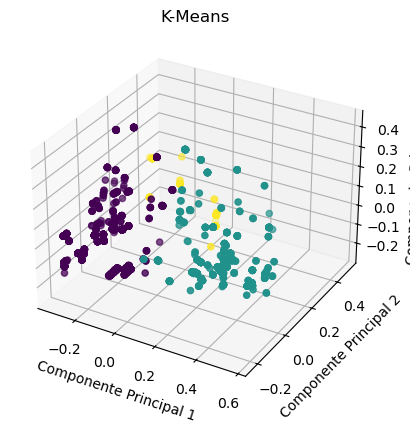

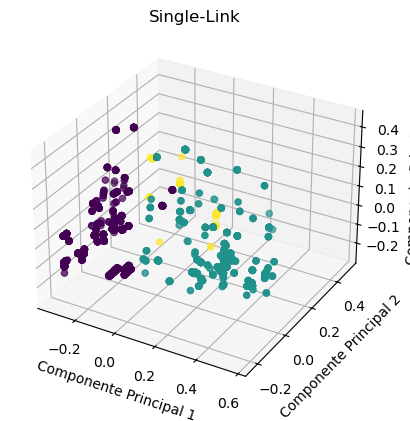

In [17]:
# Plot K-Means
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_kpca[:, 0], X_kpca[:, 1], X_kpca[:, 2], c=score_kmeans[2], cmap='viridis')
ax.set_title(f'K-Means')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.show()

# Plot Single-Link
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_kpca[:, 0], X_kpca[:, 1], X_kpca[:, 2], c=score_singlelink[2], cmap='viridis')
ax.set_title(f'Single-Link')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.show()